# Capstone 2 - Baseball Stat Projections - Exploratory Data Analysis

In [55]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
path = "/Users/joeboardman/Documents/Springboard/Capstone 2/data"
os.chdir(path)
print(os.getcwd())

/Users/joeboardman/Documents/Springboard/Capstone 2/data


In [57]:
df = pd.read_csv('Baseball_DW.csv', index_col=0)
df.head()

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,ops_vs_lg_avg_3,ops_vs_season_avg_3,avg_3,bb%_3,k%_3,XBA%_3,hr%_3,iso_3,wRAA_3,BABIP_3
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abbotje01,1999,17,57.0,5.0,9.0,0.0,0.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abbotje01,2000,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abbotku01,1993,20,61.0,11.0,15.0,1.0,0.0,3.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abbotku01,1994,101,345.0,41.0,86.0,17.0,3.0,9.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12361 entries, 0 to 12360
Data columns (total 89 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            12361 non-null  object 
 1   year                 12361 non-null  int64  
 2   g                    12361 non-null  int64  
 3   ab                   12361 non-null  float64
 4   r                    12361 non-null  float64
 5   h                    12361 non-null  float64
 6   double               12361 non-null  float64
 7   triple               12361 non-null  float64
 8   hr                   12361 non-null  float64
 9   rbi                  12361 non-null  float64
 10  sb                   12361 non-null  float64
 11  cs                   12361 non-null  float64
 12  bb                   12361 non-null  float64
 13  so                   12361 non-null  float64
 14  ibb                  12361 non-null  float64
 15  hbp                  12361 non-null 

In [59]:
round(df.describe().T,3)


,count,mean,std,min,25%,50%,75%,max
year,12361.0,2000.159,8.729,1985.000,1993.000,2000.000,2008.000,2015.000
g,12361.0,106.754,38.771,14.000,77.000,112.000,141.000,163.000
ab,12361.0,346.280,173.226,50.000,192.000,347.000,501.000,716.000
r,12361.0,47.477,29.765,0.000,22.000,43.000,70.000,152.000
h,12361.0,92.657,52.274,4.000,46.000,90.000,136.000,262.000
...,...,...,...,...,...,...,...,...
XBA%_3,12361.0,0.185,0.177,0.000,0.000,0.214,0.343,0.750
hr%_3,12361.0,0.063,0.078,0.000,0.000,0.027,0.115,0.522
iso_3,12361.0,0.087,0.090,0.000,0.000,0.079,0.159,0.537
wRAA_3,12361.0,0.806,11.896,-44.787,-3.062,0.000,0.105,111.655


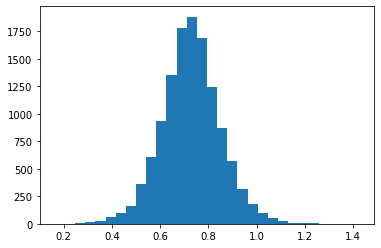

In [60]:
plt.hist(df['ops'], bins=30)
plt.show()

In [61]:
#group by mean OPS by year
df_test = df.groupby(['season'])[['ops', 'h', 'hr', 'double', 'ab', 'g']].mean()
print(df_test.head())
print(type(df_test))


             ops          h         hr     double          ab           g
season                                                                   
0       0.679199  56.562347   4.826406  10.303178  218.863081   72.420538
1       0.700753  79.252941   7.825490  15.257843  304.154902   95.624510
2       0.711484  86.882997   9.054714  16.861953  328.754209  102.936869
3       0.726564  95.251227  10.398527  18.657119  355.186579  109.531915
4       0.730811  98.315877  10.842893  19.196176  365.535328  112.029094
<class 'pandas.core.frame.DataFrame'>


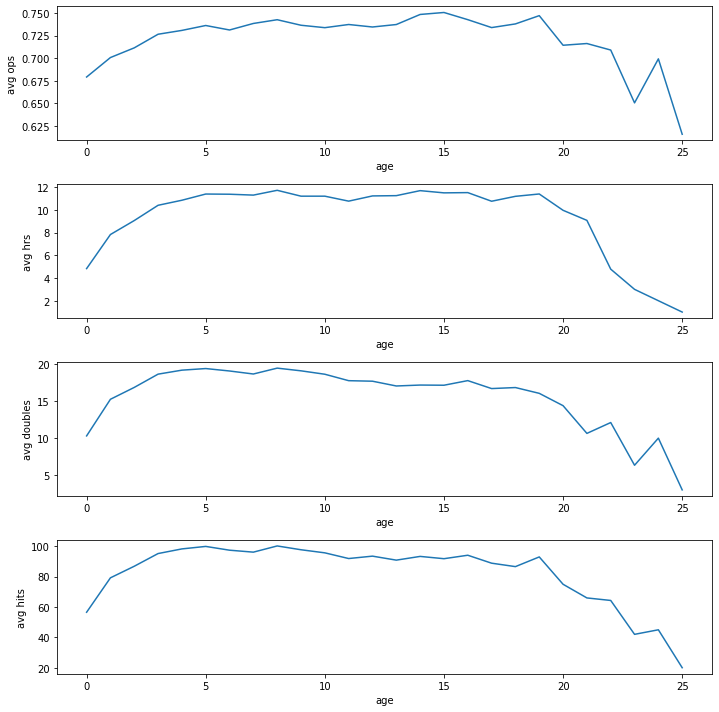

In [62]:
plt.figure(figsize=(10,10))

plt.subplot(4,1,1)
plt.plot(df_test.index, df_test.ops)
plt.xlabel('age')
plt.ylabel('avg ops')

plt.subplot(4,1,2)
plt.plot(df_test.index, df_test.hr)
plt.xlabel('age')
plt.ylabel('avg hrs')

plt.subplot(4,1,3)
plt.plot(df_test.index, df_test.double)
plt.xlabel('age')
plt.ylabel('avg doubles')

plt.subplot(4,1,4)
plt.plot(df_test.index, df_test.h)
plt.xlabel('age')
plt.ylabel('avg hits')

plt.tight_layout()
plt.show()

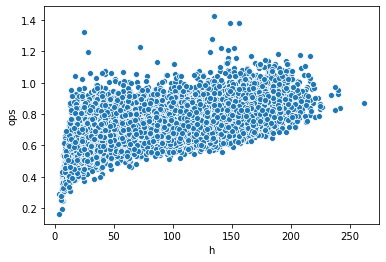

In [63]:
sns.scatterplot(df.h, df.ops)

In [64]:
#correlation table
corr = df.corr()
#heatmap
corr.round(2).style.background_gradient(cmap='coolwarm')

In [65]:
# Call the variable corr_matrix
corr_matrix = df.drop(['ops'], axis=1).corr().abs()

# Get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Iterate through our columns to gets the index of any that have a correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [66]:
# Features to be dropped
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['h', 'ops_vs_season_avg', 'player_wOBA', 'wOBA_year', 'lg_wOBAScale', 'pa', 'ops_vs_season_avg_1', 'avg_1', 'BABIP_1', 'ops_vs_season_avg_2', 'avg_2', 'iso_2', 'BABIP_2', 'ops_vs_season_avg_3', 'avg_3', 'iso_3', 'BABIP_3']


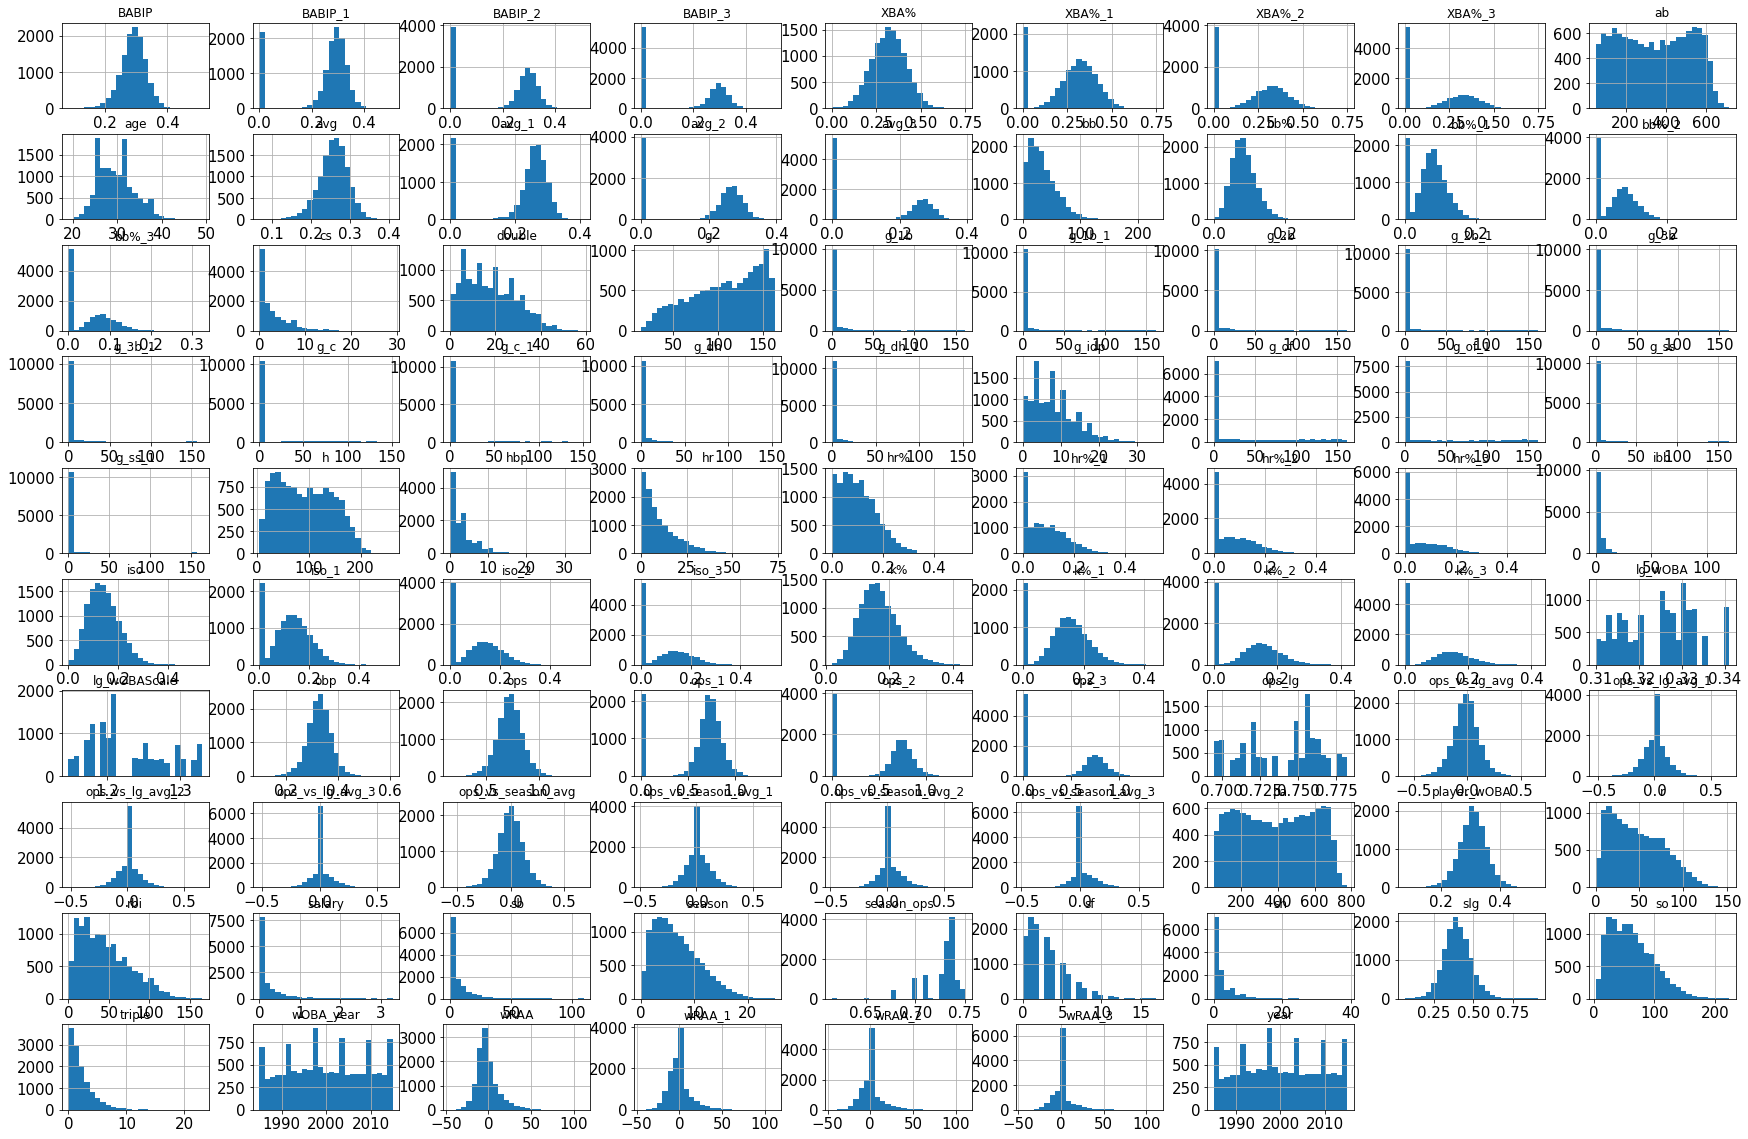

In [67]:
df.hist(bins=25, figsize=[30, 20], xlabelsize=15, ylabelsize=15)
plt.show()

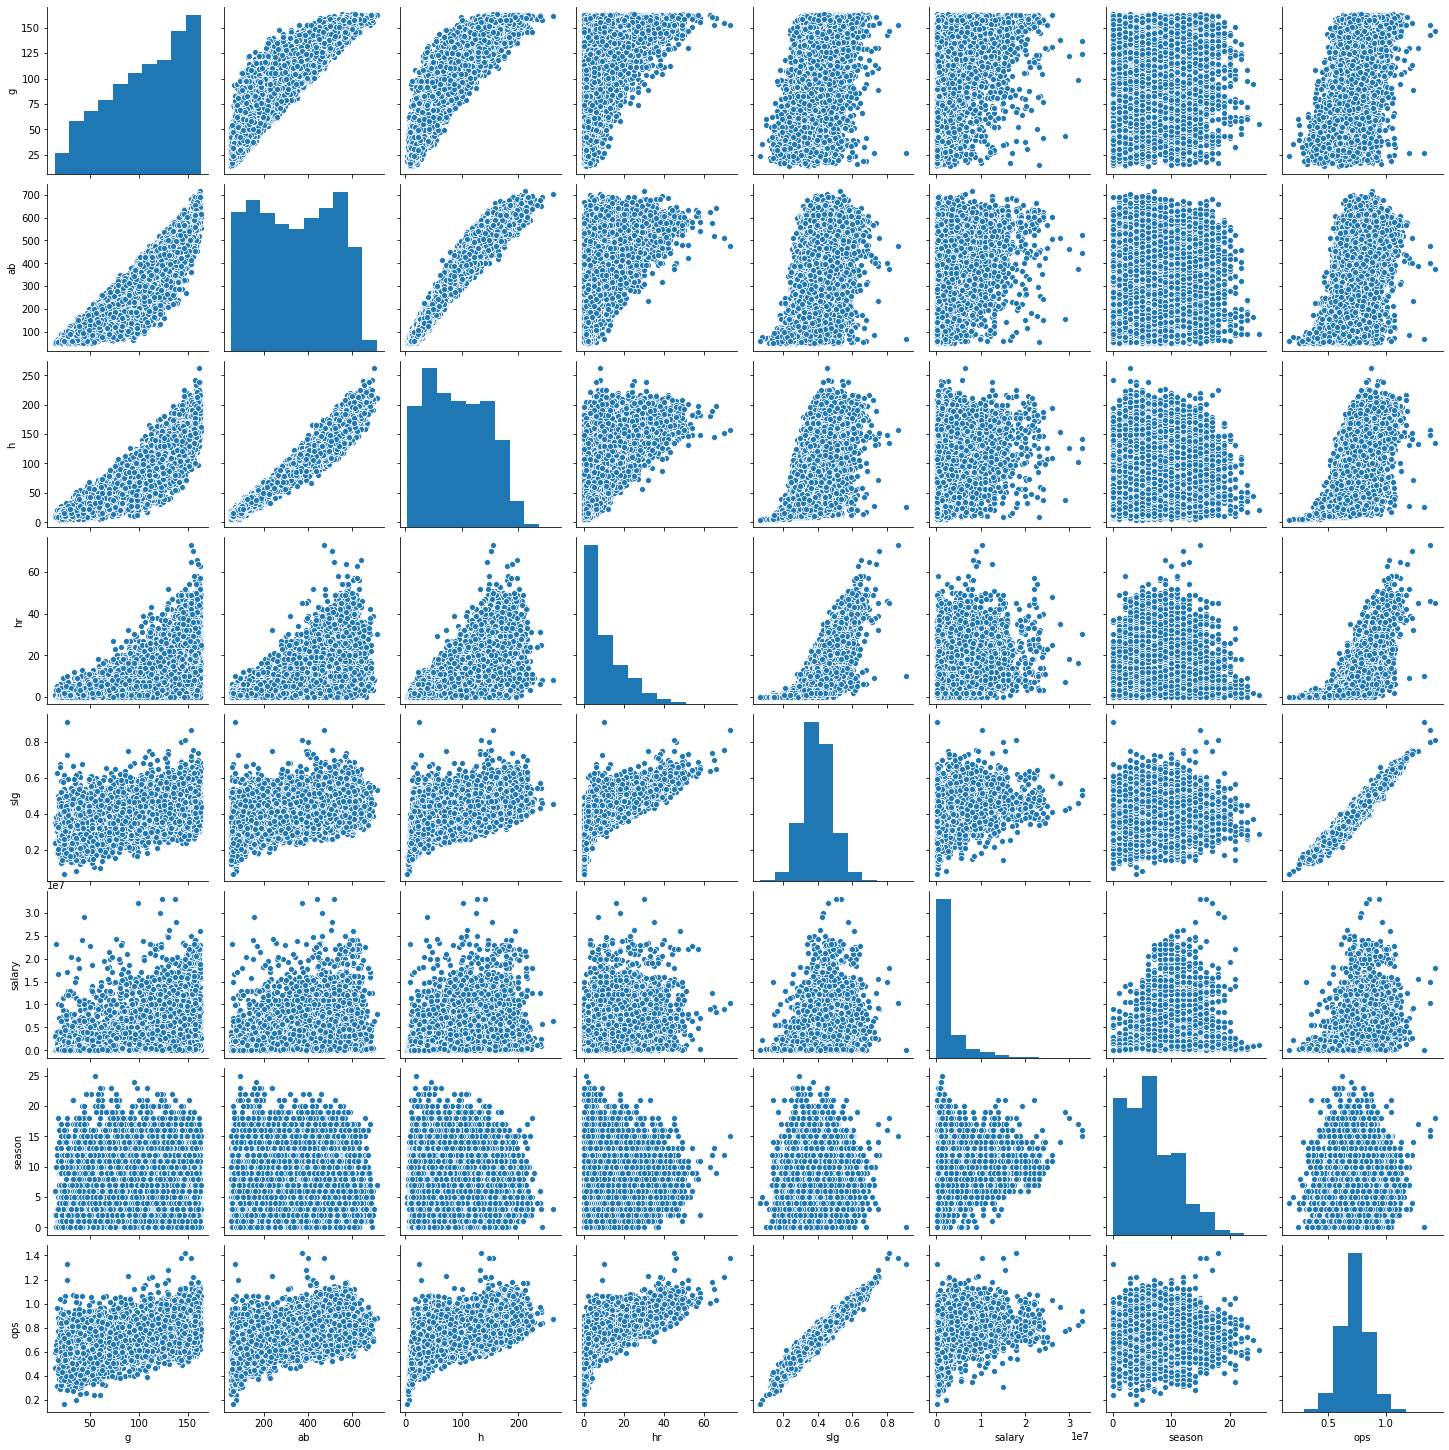

In [68]:
df_test = df.groupby(df.index)[['g', 'ab', 'h', 'hr', 'slg', 'salary', 'season', 'ops']].sum()

pairplot1 = sns.pairplot(df_test)

In [69]:
# Principal components analysis?


In [70]:
# Clustering?
